In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadDataSet(filename):
    dataMat = []
    fr = open(filename)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = map(float, curLine)
        dataMat.append(fltLine)
    return dataMat

def distEclud(vecA, vecB):
    return np.sqrt(sum(np.power(vecA - vecB, 2)))

def randCent(dataSet, k):
    m, n = dataSet.shape
    centroids = np.zeros((k, n))
    for j in range(n):
        minJ = min(dataSet[:, j])
        maxJ = max(dataSet[:, j])
        rangeJ = float(maxJ - minJ)
        centroids[:, j] = minJ + rangeJ * np.random.rand(k, 1)[:, 0]
    return centroids

def KMeans(dataMat, k, distMeas = distEclud, createCent = randCent):
    m, n = dataMat.shape
    clusterAssment = np.zeros((m, 2))
    centroids = createCent(dataMat, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = np.inf
            minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j, :], dataMat[i, :])
                #print distJI
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            if clusterAssment[i, 0] != minIndex:  ##直到质心不在发生变化，等同于每个样本的类别不在发生变化
                clusterChanged = True
            clusterAssment[i, :] = minIndex, minDist**2
        #print centroids
        for cent in range(k):
            ptsInClust = dataMat[ np.nonzero(clusterAssment[:, 0] == cent)[0] ]
            centroids[cent, :] = np.mean(ptsInClust, axis = 0)           
    return centroids, clusterAssment

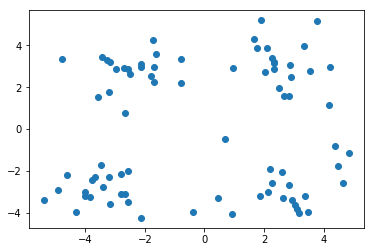

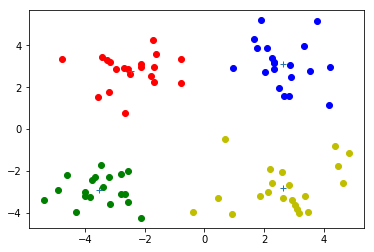

In [3]:
dataMat = loadDataSet('testSet.txt')
dataMat = np.array(dataMat)
plt.figure()
x = dataMat[:, 0]
y = dataMat[:, 1]
plt.plot(x, y, 'o')
plt.show()

centroids, clusterAssment = KMeans(dataMat, 4)
#print clusterAssment[clusterAssment[:, 0] == 0,:]
x0 = dataMat[clusterAssment[:, 0] == 0, 0]
y0 = dataMat[clusterAssment[:, 0] == 0, 1]
x1 = dataMat[clusterAssment[:, 0] == 1, 0]
y1 = dataMat[clusterAssment[:, 0] == 1, 1]
x2 = dataMat[clusterAssment[:, 0] == 2, 0]
y2 = dataMat[clusterAssment[:, 0] == 2, 1]
x3 = dataMat[clusterAssment[:, 0] == 3, 0]
y3 = dataMat[clusterAssment[:, 0] == 3, 1]
plt.figure()
plt.plot(x0, y0, 'ro')
plt.plot(x1, y1, 'go')
plt.plot(x2, y2, 'bo')
plt.plot(x3, y3, 'yo')
plt.plot(centroids[:, 0], centroids[:, 1], '+')
plt.show()


In [4]:
def biKmeans(dataSet, k, distMeas = distEclud):
    m, n = dataSet.shape
    clusterAssment = np.zeros((m, 2))
    centroid0 = np.mean(dataSet, axis = 0)#.tolist()
    centList = [centroid0]
    for j in range(m):
        clusterAssment[j, 1] = distMeas(centroid0, dataSet[j, :]) ** 2
    while len(centList) < k:
        lowestSSE = np.inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[np.nonzero(clusterAssment[:, 0] == i)[0], :]
            centroidMat, splitClustAss = KMeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = np.sum(splitClustAss[:, 1])
            sseNotSplit = np.sum(clusterAssment[np.nonzero(clusterAssment[:, 0] != i)[0], 1])
            #print "sseSplit, and notSplit: ", sseSplit, sseNotSplit
            if sseSplit + sseNotSplit < lowestSSE:   # 找使总误差平方和最小的簇，然后对其进行分裂
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[np.nonzero(bestClustAss[:, 0] == 1)[0], 0] = len(centList)  #对最小簇分裂后，得到的类别号要重新赋值，一个增加，一个不变
        bestClustAss[np.nonzero(bestClustAss[:, 0] == 0)[0], 0] = bestCentToSplit
        #print "the bestCentToSplit is: ", bestCentToSplit
        #print "the len of bestClustAss is: ", len(bestClustAss)
        centList[bestCentToSplit] = bestNewCents[0, :]
        centList.append(bestNewCents[1, :])
        clusterAssment[np.nonzero(clusterAssment[:,0] == bestCentToSplit)[0], :] = bestClustAss
    return np.array(centList), clusterAssment

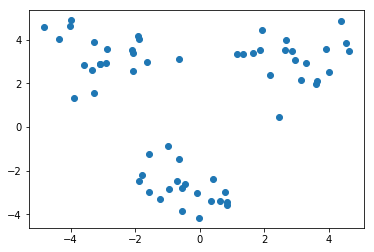

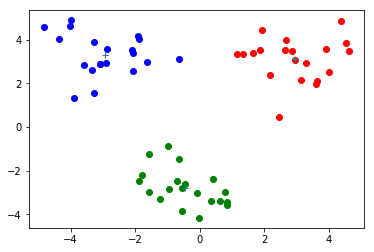

In [5]:
dataMat = loadDataSet('testSet2.txt')
dataMat = np.array(dataMat)
plt.figure()
plt.plot(dataMat[:, 0], dataMat[:, 1], 'o')
plt.show()

centList, clusterAssment = biKmeans(dataMat, 3)
x0 = dataMat[clusterAssment[:, 0] == 0, 0]
y0 = dataMat[clusterAssment[:, 0] == 0, 1]
x1 = dataMat[clusterAssment[:, 0] == 1, 0]
y1 = dataMat[clusterAssment[:, 0] == 1, 1]
x2 = dataMat[clusterAssment[:, 0] == 2, 0]
y2 = dataMat[clusterAssment[:, 0] == 2, 1]
plt.figure()
plt.plot(x0, y0, 'ro')
plt.plot(x1, y1, 'go')
plt.plot(x2, y2, 'bo')
plt.plot(centList[:, 0], centList[:, 1], '+')
plt.show()

In [ ]:
%matplotlib notebook
def distSLC(vecA, vecB):
    #print vecA, vecB
    a = np.sin(vecA[1] * np.pi / 180) * np.sin(vecB[1] * np.pi / 180)
    b = np.cos(vecA[1] * np.pi / 180) * np.cos(vecB[1] * np.pi / 180) * np.cos(np.pi * (vecB[0] - vecA[0]) / 180)
    return np.arccos(a + b) * 6371.0
    
    
def clusterClubs(numClust = 5):
    dataList = []
    fr = open('places.txt')
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataList.append([float(lineArr[-1]), float(lineArr[-2])])
    dataList = np.array(dataList)
    #print dataList
    myCentroids, clustAssing = biKmeans(dataList, numClust, distMeas = distSLC)
    
    fig = plt.figure()
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', 'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label = 'ax0', **axprops)
    imgP = plt.imread('Portland.png')
    ax0.imshow(imgP)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = dataList[np.nonzero(clustAssing[:,0]==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0], ptsInCurrCluster[:,1], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0], myCentroids[:,1], marker='+', s=300)
    plt.show()

clusterClubs()


In [ ]:
a.tolist()

In [ ]:
a = np.min(dataMat[:,0])

In [ ]:
sum(np.power(np.array([2,3]),2))

In [ ]:
a = np.random.rand(10,1)
b = a + 1